# The Mechanics of IDX Composite Index: A Historical Perspective

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data: weekly idx data was downloaded from investing.com website
datalink = r'C:\Users\Dayu Apoji\GitHub\idx\data\IDX-201812w.csv' 
data = pd.read_csv(datalink)

In [3]:
# show raw data
df = data
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 30, 2018","6,274.54","6,197.87","6,274.54","6,164.83",20.58B,1.29%
1,"Dec 23, 2018","6,194.50","6,126.65","6,212.12","6,094.41",18.87B,0.50%
2,"Dec 16, 2018","6,163.60","6,163.63","6,176.09","6,014.80",32.95B,-0.10%
3,"Dec 09, 2018","6,169.84","6,103.10","6,186.05","6,069.16",35.19B,0.71%
4,"Dec 02, 2018","6,126.36","6,118.06","6,157.30","6,064.83",34.99B,1.16%


In [4]:
# data cleaning
df['Date'] = pd.to_datetime(df['Date'])
df['DateNum'] = matplotlib.dates.date2num(df['Date'])

for i in list(range(1,5)):
    df[df.columns[i]] = df[df.columns[i]].str.replace(',','').astype(float)

df['Change %'] = df['Change %'].str.replace('%','').astype(float)

In [5]:
# show clean data
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,DateNum
0,2018-12-30,6274.54,6197.87,6274.54,6164.83,20.58B,1.29,737058.0
1,2018-12-23,6194.50,6126.65,6212.12,6094.41,18.87B,0.50,737051.0
2,2018-12-16,6163.60,6163.63,6176.09,6014.80,32.95B,-0.10,737044.0
3,2018-12-09,6169.84,6103.10,6186.05,6069.16,35.19B,0.71,737037.0
4,2018-12-02,6126.36,6118.06,6157.30,6064.83,34.99B,1.16,737030.0


## Historical overview from 1990 to 2018

Text(0, 0.5, 'Change (%)')

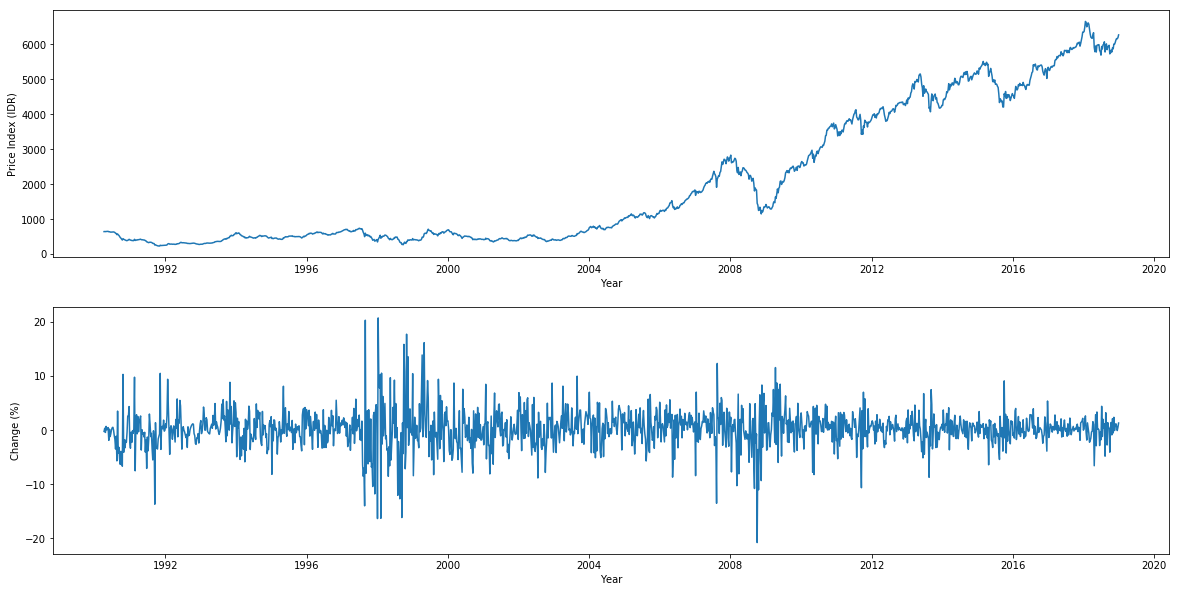

In [30]:
# plot
x = df['DateNum']
y1 = df['Price']
y2 = df['Change %']
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
ax1.plot_date(x, y1, linestyle = '-', marker = '')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price Index (IDR)')
ax2.plot_date(x, y2, linestyle = '-', marker = '')
ax2.set_xlabel('Year')
ax2.set_ylabel('Change (%)')

## Yearly trendlines

In [8]:
# separate months and year
df['Day'] = df['Date'].dt.dayofyear
df['Year'] = df['Date'].dt.year

# split dataframe to create dataframes of each year
dfyear = dict(tuple(df.groupby('Year')))

# check for a year
dfyear[2018].head()

,Date,Price,Open,High,Low,Vol.,Change %,DateNum,Day,Year
0,2018-12-30,6274.54,6197.87,6274.54,6164.83,20.58B,1.29,737058.0,364,2018
1,2018-12-23,6194.50,6126.65,6212.12,6094.41,18.87B,0.50,737051.0,357,2018
2,2018-12-16,6163.60,6163.63,6176.09,6014.80,32.95B,-0.10,737044.0,350,2018
3,2018-12-09,6169.84,6103.10,6186.05,6069.16,35.19B,0.71,737037.0,343,2018
4,2018-12-02,6126.36,6118.06,6157.30,6064.83,34.99B,1.16,737030.0,336,2018


In [9]:
# create a function
def scale(year):
    """
    function to scale the price column of a year and store it in a new column named the year.
    """
    df = dfyear[year]
    df[year] = df[['Price']]
    df[[year]] = MaxAbsScaler().fit_transform(df[[year]])

# create list of years
yearlist = []
yearstart = 1990
while yearstart < 2019:
    yearlist.append(yearstart)
    yearstart = yearstart + 1

In [10]:
# perform scale function for all years in the year list    
for year in yearlist:
    scale(year)

# check for a year
dfyear[year].head()

,Date,Price,Open,High,Low,Vol.,Change %,DateNum,Day,Year,2018
0,2018-12-30,6274.54,6197.87,6274.54,6164.83,20.58B,1.29,737058.0,364,2018,0.942035
1,2018-12-23,6194.50,6126.65,6212.12,6094.41,18.87B,0.50,737051.0,357,2018,0.930019
2,2018-12-16,6163.60,6163.63,6176.09,6014.80,32.95B,-0.10,737044.0,350,2018,0.925379
3,2018-12-09,6169.84,6103.10,6186.05,6069.16,35.19B,0.71,737037.0,343,2018,0.926316
4,2018-12-02,6126.36,6118.06,6157.30,6064.83,34.99B,1.16,737030.0,336,2018,0.919788


In [11]:
# create a function
def plot(year):
    """
    function to plot the scaled price of a year.
    """
    df = dfyear[year]
    df = df[::-1]
    x = df.Day
    y = df[year]
    plt.plot(x, y)
    plt.legend(loc = 'right')

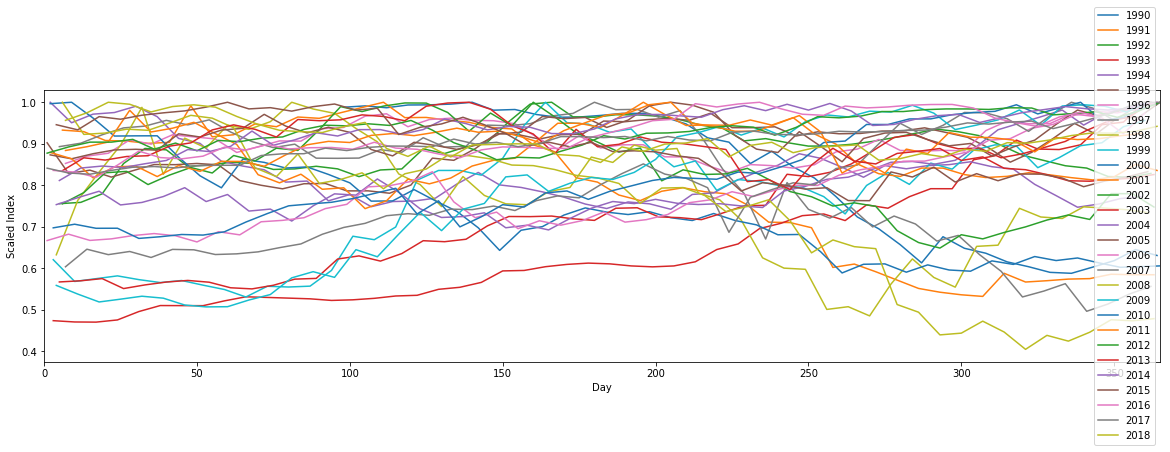

In [12]:
# plot the scaled price of all years in the list on a single graph      
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlim(0, 365)
ax.set_xlabel('Day')
ax.set_ylabel('Scaled Index')
for year in yearlist:
    plot(year)

## Market expansion and contraction

In [13]:
bullyears = [ ]
bearyears = [ ]
for i in yearlist:
    dfi = dfyear[i]
    if dfi['Price'].iloc[0] > dfi['Price'].iloc[-1]:
        bullyears.append(i)
    else:
        bearyears.append(i)

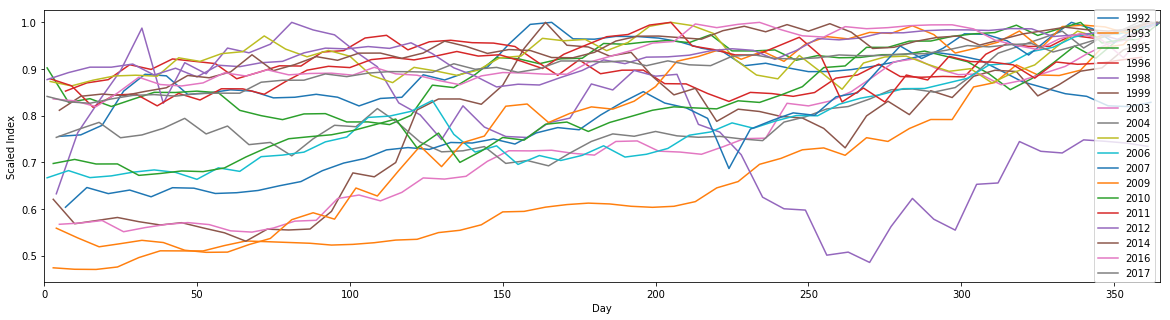

In [14]:
#plot
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlim(0, 365)
ax.set_xlabel('Day')
ax.set_ylabel('Scaled Index')
for year in bullyears:
    plot(year)

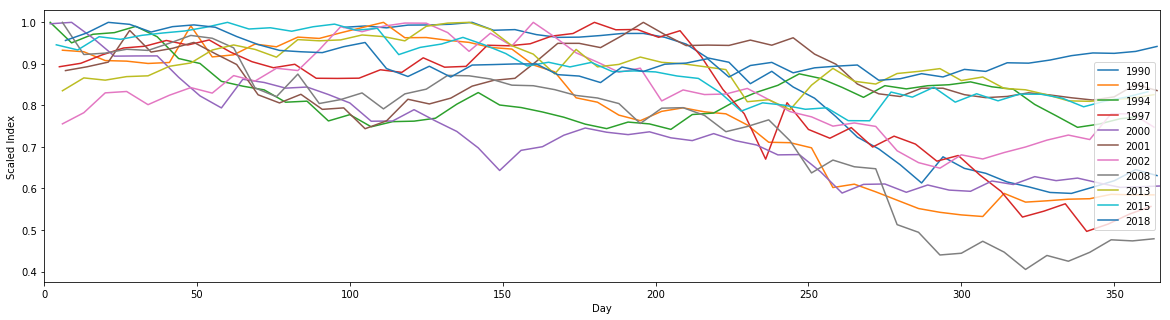

In [15]:
# plot
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlim(0, 365)
ax.set_xlabel('Day')
ax.set_ylabel('Scaled Index')
for year in bearyears:
    plot(year)

In [16]:
# create filters for the defined categories
filter_bull = df['Year'].isin([str(i) for i in bullyears])
filter_bear = df['Year'].isin([str(i) for i in bearyears])

# create a column for categories
df['Cycle'] = np.where(filter_bull, 'Bull', 'Bear')

Text(0, 0.5, 'Price Index (IDR)')

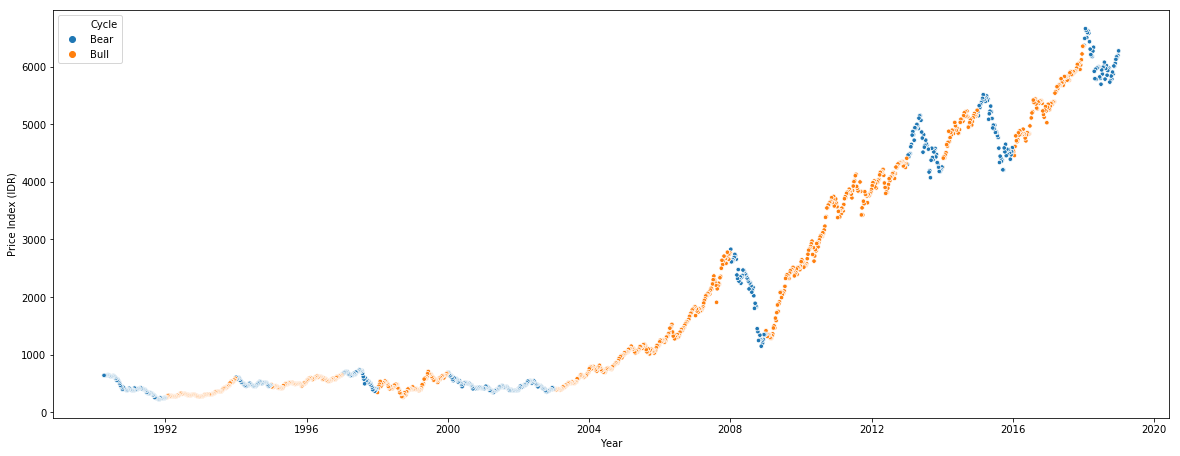

In [17]:
# plot
x = df['Date']
y = df['Price']
fig, ax = plt.subplots(figsize=(20, 7.5))
sns.scatterplot(x, y, hue = df['Cycle'], s = 20)
ax.set_xlabel('Year')
ax.set_ylabel('Price Index (IDR)')

## More detail on market fluctuation

In [18]:
# define list of years
fluc1years = [1996, 2002, 2013]
fluc2years = [1992, 1995, 2001, 2005, 2011]

# remove years in the list above from the previous lists of bull and bear years
for i in fluc1years + fluc2years:
    if (i in bullyears):
        bullyears.remove(i)
    else:
        bearyears.remove(i)

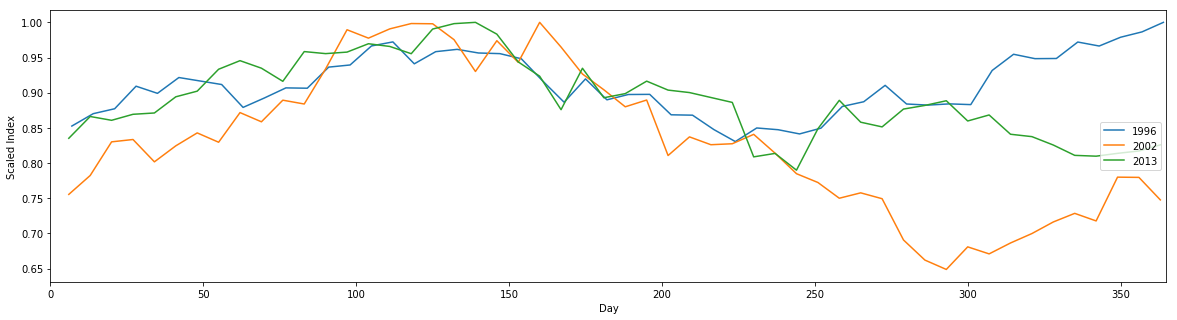

In [19]:
# plot
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlim(0,365)
ax.set_xlabel('Day')
ax.set_ylabel('Scaled Index')
for year in fluc1years:
    plot(year)

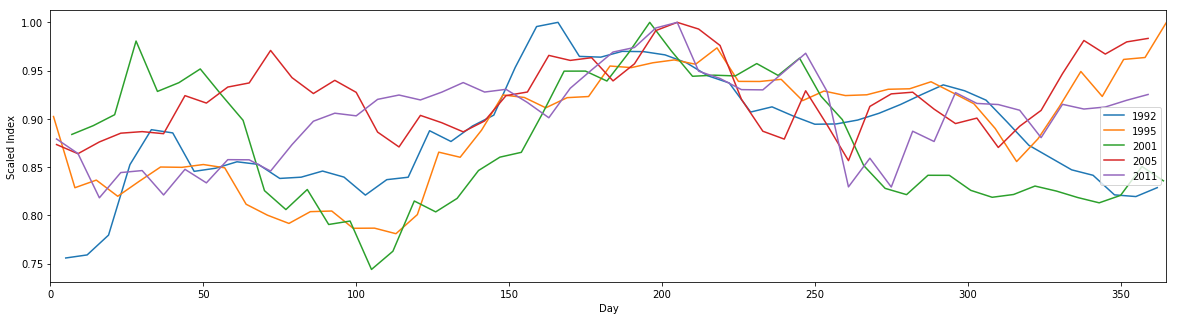

In [20]:
# plot
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlim(0,365)
ax.set_xlabel('Day')
ax.set_ylabel('Scaled Index')
for year in fluc2years:
    plot(year)

## Market cycle in historical perspective

In [21]:
# create filters for the defined categories
filter_bull = df['Year'].isin([str(i) for i in bullyears])
filter_bear = df['Year'].isin([str(i) for i in bearyears])
filter_fluc1 = df['Year'].isin([str(i) for i in fluc1years])
filter_fluc2 = df['Year'].isin([str(i) for i in fluc2years])

# create and populate a column for the defined categories
df['Cycle'] = np.where(filter_bull, 'Bull', (
              np.where(filter_bear, 'Bear', (
              np.where(filter_fluc1, 'Fluc-1', 'Fluc-2')))))

Text(0, 0.5, 'Price Index (IDR)')

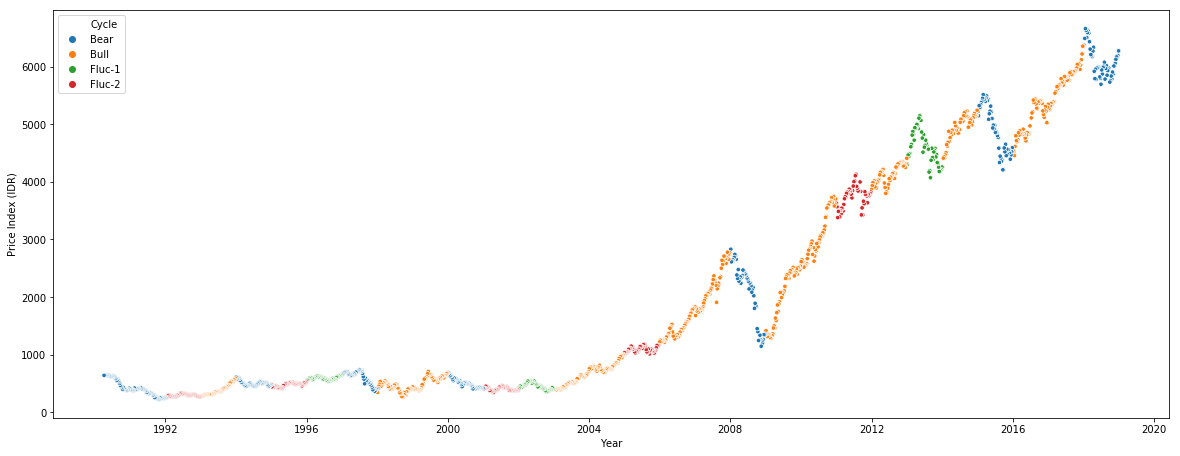

In [22]:
# plot
x = df['Date']
y = df['Price']
fig, ax = plt.subplots(figsize=(20, 7.5))
sns.scatterplot(x, y, hue = df['Cycle'], s = 20)
ax.set_xlabel('Year')
ax.set_ylabel('Price Index (IDR)')